In [1]:
import pandas as pd 
import numpy as np
import shapefile as shp
import matplotlib.pyplot as plt
import os

In [2]:
mapa2=shp.Reader("alcaldias.shp")
data=pd.read_csv("carpetas_completa_marzo_2021.csv")

C:\Users\Studio\2021\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp
    package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [4]:
def plot_map(sf, figsize = (10,12)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')

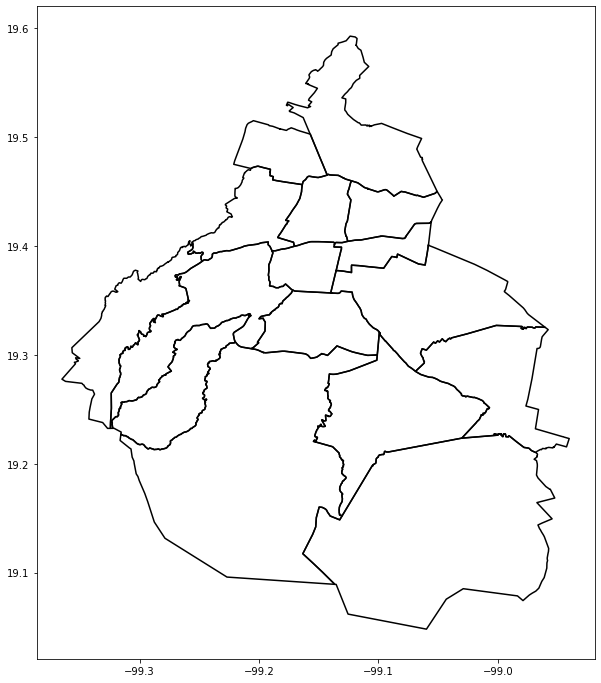

In [5]:
plot_map(mapa2)

In [6]:
data["delito"]

0                        DAÑO EN PROPIEDAD AJENA INTENCIONAL
1          ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...
2                               NARCOMENUDEO POSESION SIMPLE
3             ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA
4                                         DENUNCIA DE HECHOS
                                 ...                        
1188785                                             AMENAZAS
1188786                                               FRAUDE
1188787                           ROBO DE ACCESORIOS DE AUTO
1188788                                              DESPOJO
1188789                           ROBO DE ACCESORIOS DE AUTO
Name: delito, Length: 1188790, dtype: object

In [7]:
type(data["fecha_hechos"][0])

str

In [8]:
np.unique(data["delito"])

array(['ABANDONO DE PERSONA', 'ABORTO', 'ABUSO DE AUTORIDAD',
       'ABUSO DE AUTORIDAD Y USO ILEGAL DE LA FUERZA PUBLICA',
       'ABUSO DE CONFIANZA', 'ABUSO SEXUAL', 'ACOSO SEXUAL',
       'ACOSO SEXUAL AGRAVADO EN CONTRA DE MENORES',
       'ALLANAMIENTO DE MORADA',
       'ALLANAMIENTO DE MORADA, DESPACHO, OFICINA O ESTABLECIMIENTO MERCANTIL',
       'AMENAZAS', 'ASOCIACION DELICTUOSA',
       'ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)',
       'ATAQUE A LAS VIAS GENERALES DE COMUNICACIÓN',
       'ATAQUES A LA PAZ PUBLICA', 'BIGAMIA', 'CALUMNIAS',
       'CAMBIO DE USO DE SUELO', 'COACCION DE SERVIDORES PUBLICOS',
       'COALICIÓN DE SERVIDORES PÚBLICOS', 'COBRANZA ILEGITIMA',
       'COHECHO', 'CONCUSION', 'CONTAGIO VENERERO',
       'CONTAMINACIÓN O RESIDUOS',
       'CONTRA EL CUMPLIMIENTO DE LA OBLIGACION ALIMENTARIA',
       'CONTRA EL ESTADO CIVIL', 'CONTRA FUNCIONARIOS PUBLICOS',
       'CONTRA LA INTIMIDAD SEXUAL',
       'CONTRA LA LEY GENE

In [9]:
data1=data[["categoria_delito","ao_hechos","mes_inicio"]]

In [10]:
data1

,categoria_delito,ao_hechos,mes_inicio
0,DELITO DE BAJO IMPACTO,2016.0,Febrero
1,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,2016.0,Febrero
2,DELITO DE BAJO IMPACTO,2016.0,Febrero
3,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,2016.0,Febrero
4,HECHO NO DELICTIVO,2015.0,Febrero
...,...,...,...
1188785,DELITO DE BAJO IMPACTO,2021.0,Marzo
1188786,DELITO DE BAJO IMPACTO,2021.0,Marzo
1188787,DELITO DE BAJO IMPACTO,2021.0,Marzo
1188788,DELITO DE BAJO IMPACTO,2021.0,Marzo


In [11]:
data1.groupby("categoria_delito").count().nlargest(10,"ao_hechos")

,ao_hechos,mes_inicio
categoria_delito,,
DELITO DE BAJO IMPACTO,924561,924857
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOLENCIA,68074,68090
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,63652,63690
HECHO NO DELICTIVO,55774,55831
ROBO A NEGOCIO CON VIOLENCIA,19783,19791
ROBO A REPARTIDOR CON Y SIN VIOLENCIA,12388,12397
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIOLENCIA,10991,10992
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,8827,8829
HOMICIDIO DOLOSO,6887,6890


In [12]:
data2=data1[data1["ao_hechos"].isin([2018,2019,2020,2021])]

In [13]:
data2.groupby(['ao_hechos', 'categoria_delito']).count()

mes_inicio
ao_hechos categoria_delito                                              
2018.0    DELITO DE BAJO IMPACTO                                  185366
          HECHO NO DELICTIVO                                       10124
          HOMICIDIO DOLOSO                                          1537
          LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO             2194
          ROBO A CASA HABITACIÓN CON VIOLENCIA                       564
...                                                                  ...
2021.0    ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOL...        2579
          ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                    29
          ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                      1897
          SECUESTRO                                                    1
          VIOLACIÓN                                                  321

[66 rows x 1 columns]

<AxesSubplot:xlabel='ao_hechos'>

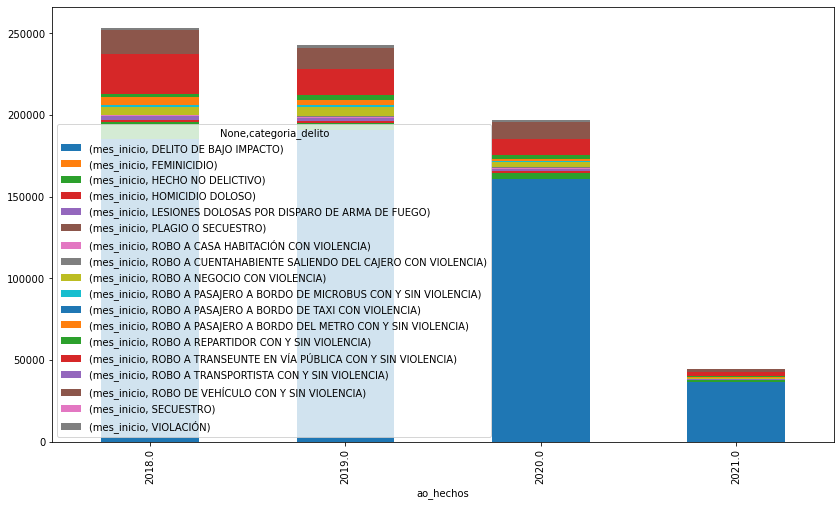

In [14]:
data2.groupby(['ao_hechos', 'categoria_delito']).count().unstack().plot(kind = "bar", stacked = True, figsize = (14,8))

In [15]:
data2

,categoria_delito,ao_hechos,mes_inicio
125955,DELITO DE BAJO IMPACTO,2018.0,Enero
125957,DELITO DE BAJO IMPACTO,2018.0,Enero
125958,DELITO DE BAJO IMPACTO,2018.0,Enero
125959,DELITO DE BAJO IMPACTO,2018.0,Enero
125961,DELITO DE BAJO IMPACTO,2018.0,Enero
...,...,...,...
1188785,DELITO DE BAJO IMPACTO,2021.0,Marzo
1188786,DELITO DE BAJO IMPACTO,2021.0,Marzo
1188787,DELITO DE BAJO IMPACTO,2021.0,Marzo
1188788,DELITO DE BAJO IMPACTO,2021.0,Marzo


In [16]:
data3=data2[data2["categoria_delito"]=="HOMICIDIO DOLOSO"]

In [17]:
data3

,categoria_delito,ao_hechos,mes_inicio
126244,HOMICIDIO DOLOSO,2018.0,Enero
126445,HOMICIDIO DOLOSO,2018.0,Enero
126677,HOMICIDIO DOLOSO,2018.0,Enero
126814,HOMICIDIO DOLOSO,2018.0,Enero
126906,HOMICIDIO DOLOSO,2018.0,Enero
...,...,...,...
1186611,HOMICIDIO DOLOSO,2021.0,Marzo
1186651,HOMICIDIO DOLOSO,2021.0,Marzo
1187325,HOMICIDIO DOLOSO,2021.0,Marzo
1188279,HOMICIDIO DOLOSO,2021.0,Marzo


<AxesSubplot:xlabel='mes_inicio'>

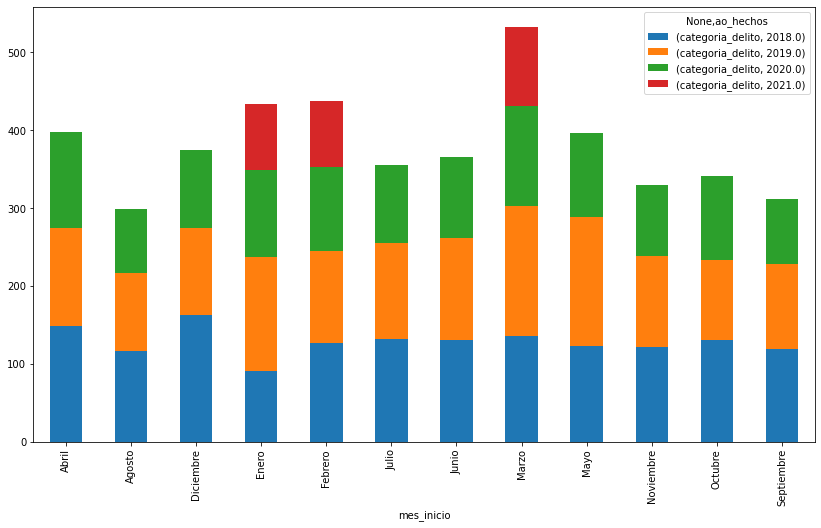

In [18]:
data3.groupby(["mes_inicio","ao_hechos"]).count().unstack().plot(kind = "bar", stacked = True, figsize = (14,8))